In [1]:
## The lab was completed with all four partners (Jake, Dennis, Mitch and Billy) working on the same 
# computer with everyone helping, troubleshooting, looking at resources and helping develoup the code.

In [2]:
##Jake Affaneh-uploading the video file and cropping the first image to identify lane lines

In [3]:
import cv2

In [4]:
import argparse

In [5]:
from IPython.display import Video

In [6]:
Video("Lab1VideoClip10Sec.mp4")

In [7]:
import matplotlib.pylab as plt

In [8]:
import cv2

In [9]:
import numpy as np

In [10]:
#image = cv2.imread("ImageLab1.png")

In [11]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
def process(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    print(gray_image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
    (500, 1000),
    (500, 750),
    (1200, 740),
    (1500, 1000)
    ]
    canny_image = cv2.Canny(gray_image, 15, 50)
    plt.imshow(canny_image)
    cropped_image = region_of_interest(canny_image,
                                  np.array([region_of_interest_vertices],np.int32))
    print(cropped_image.shape)
    lines = cv2.HoughLinesP(cropped_image,
                       rho=6,
                       theta=np.pi/60,
                       threshold=160,
                       lines=np.array([]),
                       minLineLength=40,
                       maxLineGap=25)
    image_with_lines = drow_the_lines(image, lines) 
    return canny_image
    

In [13]:
## Mitch Reberg worked on troubleshooting this cell, also working on the "threshold values" that went 
# along with the canny image so that the detection would be more visible and pick up less unwanted lines.

In [14]:
cap = cv2.VideoCapture('Lab1VideoClip10Sec.mp4')

In [15]:
cap.isOpened()

True

(376, 672)


NameError: name 'region_of_interest' is not defined

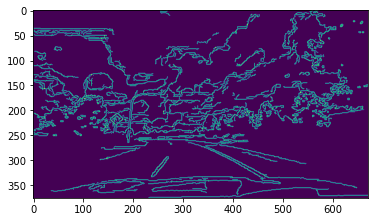

In [16]:
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = process(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        continue

#Dennis made while loop to make arrays 2x2 arrays from each picture frame
#of the video

In [ ]:
cap.release()

In [ ]:
cv2.destroyAllWindows()

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#Dennis used grayscale filter used to make video more black and white for 
#lane line detection

In [ ]:
def show_with_matplotlib(color_img, title, pos): """Shows an image using matplotlib capabilities"""

In [ ]:
plt.imshow(gray_image, cmap='gray')

In [ ]:
plt.figure(figsize=(12, 6))
plt.suptitle("Comparing different kernels using cv2.filter2D()", fontsize=14, fontweight='bold')


In [ ]:
def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    if type(None) == type(lines):
        return img
    else:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(blank_image, (x1,y1), (x2,y2), (0,255, 0), thickness=3)
            
        img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
        return img


In [ ]:
print(gray_image.shape)

In [ ]:
height = image.shape[0]

In [ ]:
width = image.shape[1]

In [ ]:
region_of_interest_vertices = [
    (500, 1000),
    (500, 750),
    (1200, 740),
    (1500, 1000)
]

In [ ]:
#Bill helped crop the image to help minimize the lines being detected in the frame

In [ ]:
def region_of_interest(img, vertices):
    plt.imshow(img)
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    mask = cv2.fillPoly(mask, vertices, match_mask_color)
    #plt.imshow(mask)
    masked_image = cv2.bitwise_and(img, mask)
    #plt.imshow(masked_image)
    return masked_image

In [ ]:
#Bill helped troubleshoot this cell to figure out lane detection image

In [ ]:
canny_image = cv2.Canny(gray_image, 15, 50)
plt.imshow(canny_image)

In [ ]:
cropped_image = region_of_interest(canny_image,
                                  np.array([region_of_interest_vertices],np.int32))
plt.imshow(cropped_image)

In [ ]:
print(cropped_image.shape)
lines = cv2.HoughLinesP(cropped_image,
                       rho=6,
                       theta=np.pi/60,
                       threshold=160,
                       lines=np.array([]),
                       minLineLength=40,
                       maxLineGap=25)

In [ ]:
image_with_lines = drow_the_lines(image, lines)

In [ ]:
plt.imshow(image_with_lines)

In [ ]:
plt.imshow(cropped_image)

In [ ]:
#cropped_image = region_of_interest(sobel_y_image,
                                 # np.array([region_of_interest_vertices],np.int32))